<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# импорт библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# создание данных - очень размытые
# 3 кластера blobs
X_blob, y_blob       = datasets.make_blobs(n_samples=21, 
                                           cluster_std=1,
                                           random_state=0)

# 2 кольца
X_circles, y_circles = datasets.make_circles(n_samples=50,
                                             shuffle=True,
                                             noise=0.15,
                                             factor=0.2,
                                             random_state=42)

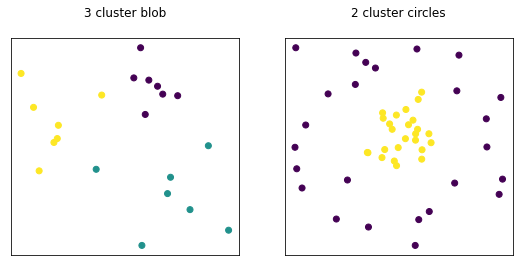

In [23]:
# стандартизация
scaler = StandardScaler()
X_blob_std = scaler.fit_transform(X_blob)
X_circles_std = scaler.fit_transform(X_circles)
# печать
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.title('3 cluster blob\n')
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=y_blob)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title('2 cluster circles\n')
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=y_circles)
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
# функция для обучения
def dbscan_predict(data, n, eps):
  dbscan_ = DBSCAN(eps=eps,         # расстояние эпсилон
                   min_samples=n)   # минимум точек в окрестности
              
  labels = dbscan_.fit_predict(data)
  return labels

In [34]:
# пробный вызов - почти все точки ушли в шум(-1)
print(dbscan_predict(X_blob_std, 2, 0.1))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1]


In [35]:
# а теперь все точки по отдельным кластерам
print(dbscan_predict(X_blob_std, 1, 0.01))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


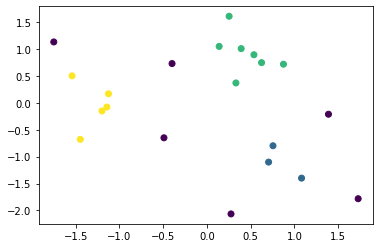

In [37]:
# визуально, фиолетовые точки - без класса (шум)
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=dbscan_predict(X_blob_std, 2, 0.6));

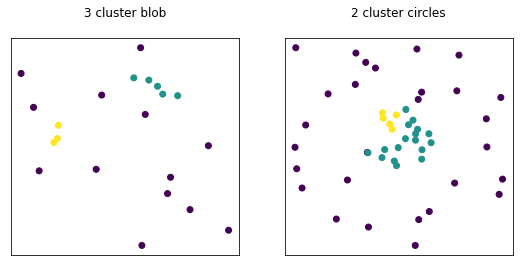

In [45]:
# итог - нужно подбирать параметры, иначе ничего не получится
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.title('3 cluster blob\n')
plt.scatter(X_blob_std[:, 0], X_blob_std[:, 1], c=dbscan_predict(X_blob_std, 2, 0.3))
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title('2 cluster circles\n')
plt.scatter(X_circles_std[:, 0], X_circles_std[:, 1], c=dbscan_predict(X_circles_std, 4, 0.3))
plt.xticks([])
plt.yticks([])
plt.show()